In [1]:
#Importamos librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy import stats

%matplotlib inline

In [2]:
#Importamos CSV con los datos de strava
df = pd.read_csv('jeddah_strava_segments.csv', encoding = 'utf-8')
df.head()

user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
0   19 and under        1   2018-12-10   male         1         58.7   
1   19 and under        2   2019-04-27   male         2         39.9   
2   19 and under        3   2019-12-13   male         3         36.4   
3   19 and under        4   2017-12-28   male         4         36.2   
4   19 and under        5   2015-02-09   male         5         35.0   

   smt_finish_seconds            smt_name user_weight_category  \
0                 240  Starbucks to Majid      54 kg and under   
1                 353  Starbucks to Majid          65 to 74 kg   
2                 387  Starbucks to Majid          65 to 74 kg   
3                 389  Starbucks to Majid      54 kg and under   
4                 402  Starbucks to Majid      54 kg and under   

                                           act_title  act_avg_spd  \
0                                     Afternoon Ride         37.0   
1                                       Morning Ride         37.3   
2  تمرين صباحي جميل winking face flexed biceps ma...         26.3   
3                                       Morning Ride         31.4   
4                        Evening Speeders Group Ride         20.2   

   act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
0        150.8         52.93                5147               5147   
1         53.3         42.06                4057               4057   
2         46.4         65.43                8962               8962   
3         45.4         44.60                5121               5121   
4         46.8        103.59               18504              18504   

   has_hr_data  
0            0  
1            0  
2            0  
3            0  
4            0

In [3]:
df.columns

Index(['user_age_group', 'user_id', 'attempt_date', 'gender', 'smt_rank',
       'smt_avg_spd', 'smt_finish_seconds', 'smt_name', 'user_weight_category',
       'act_title', 'act_avg_spd', 'act_max_spd', 'act_total_km',
       'act_moving_seconds', 'act_total_seconds', 'has_hr_data'],
      dtype='object')

In [4]:
df.shape

(7865, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7865 entries, 0 to 7864
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_age_group        7865 non-null   object 
 1   user_id               7865 non-null   int64  
 2   attempt_date          7865 non-null   object 
 3   gender                7865 non-null   object 
 4   smt_rank              7865 non-null   int64  
 5   smt_avg_spd           7865 non-null   float64
 6   smt_finish_seconds    7865 non-null   int64  
 7   smt_name              7865 non-null   object 
 8   user_weight_category  7430 non-null   object 
 9   act_title             7865 non-null   object 
 10  act_avg_spd           7865 non-null   float64
 11  act_max_spd           7865 non-null   float64
 12  act_total_km          7865 non-null   float64
 13  act_moving_seconds    7865 non-null   int64  
 14  act_total_seconds     7865 non-null   int64  
 15  has_hr_data          

In [6]:
#detectamos dato nulos
df.isnull().sum()

#Detectamos que en la columna 'user_weight_category' es la única con datos nulos, 435 datos nulos.

user_age_group            0
user_id                   0
attempt_date              0
gender                    0
smt_rank                  0
smt_avg_spd               0
smt_finish_seconds        0
smt_name                  0
user_weight_category    435
act_title                 0
act_avg_spd               0
act_max_spd               0
act_total_km              0
act_moving_seconds        0
act_total_seconds         0
has_hr_data               0
dtype: int64

In [7]:
#Tenemos un 5.53% de los datos nulos, todos concentrado en la columna 'user_weight_category', posiblemente no es una columna que usemos.
#A lo largo del exploratorio comprobaremos si se utilizará.
porcentaje_user_wieght = round((df['user_weight_category'].isnull().sum()/len(df))*100,2)
porcentaje_user_wieght

5.53

In [8]:
#Vemos el total de usuarios que han resgistrado sus actividades
print('Total de usuarios que han registrado actividades: ' + str(len(df['user_id'].unique())))

Total de usuarios que han registrado actividades: 2254


In [9]:
#Total de segmentos rastrados en todos los registros
print('Número de segmentos registrados en las actividades realizadas: ' + str(len(df['smt_name'].unique())))

Número de segmentos registrados en las actividades realizadas: 9


In [10]:
df.describe()

user_id     smt_rank  smt_avg_spd  smt_finish_seconds  act_avg_spd  \
count  7865.000000  7865.000000  7865.000000         7865.000000  7865.000000   
mean    782.752066   170.812460    26.853605          532.284425    22.724183   
std     538.107485   172.264869     8.473986          436.613303     5.784037   
min       1.000000     1.000000     0.800000          112.000000     0.000000   
25%     335.000000    36.000000    21.300000          266.000000    18.700000   
50%     707.000000   107.000000    26.500000          441.000000    22.200000   
75%    1093.000000   266.000000    32.500000          653.000000    26.500000   
max    2254.000000   805.000000    87.300000        10854.000000    75.200000   

       act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
count  7865.000000   7865.000000        7.865000e+03       7.865000e+03   
mean     44.900280     42.224657        1.202441e+04       1.202441e+04   
std      16.828302     27.690854        1.972564e+05       1.972564e+05   
min       8.600000      2.280000        2.640000e+02       2.640000e+02   
25%      37.100000     23.540000        4.095000e+03       4.095000e+03   
50%      42.100000     37.590000        5.770000e+03       5.770000e+03   
75%      48.600000     52.160000        8.084000e+03       8.084000e+03   
max     690.800000    706.590000        1.167978e+07       1.167978e+07   

       has_hr_data  
count  7865.000000  
mean      0.199491  
std       0.399643  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [11]:
df.head()

user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
0   19 and under        1   2018-12-10   male         1         58.7   
1   19 and under        2   2019-04-27   male         2         39.9   
2   19 and under        3   2019-12-13   male         3         36.4   
3   19 and under        4   2017-12-28   male         4         36.2   
4   19 and under        5   2015-02-09   male         5         35.0   

   smt_finish_seconds            smt_name user_weight_category  \
0                 240  Starbucks to Majid      54 kg and under   
1                 353  Starbucks to Majid          65 to 74 kg   
2                 387  Starbucks to Majid          65 to 74 kg   
3                 389  Starbucks to Majid      54 kg and under   
4                 402  Starbucks to Majid      54 kg and under   

                                           act_title  act_avg_spd  \
0                                     Afternoon Ride         37.0   
1                                       Morning Ride         37.3   
2  تمرين صباحي جميل winking face flexed biceps ma...         26.3   
3                                       Morning Ride         31.4   
4                        Evening Speeders Group Ride         20.2   

   act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
0        150.8         52.93                5147               5147   
1         53.3         42.06                4057               4057   
2         46.4         65.43                8962               8962   
3         45.4         44.60                5121               5121   
4         46.8        103.59               18504              18504   

   has_hr_data  
0            0  
1            0  
2            0  
3            0  
4            0

In [12]:
#Cambiamos segundos por minutos en el tiempo de actividad
df['act_moving_seconds'] = df['act_moving_seconds']/60
df.head()

user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
0   19 and under        1   2018-12-10   male         1         58.7   
1   19 and under        2   2019-04-27   male         2         39.9   
2   19 and under        3   2019-12-13   male         3         36.4   
3   19 and under        4   2017-12-28   male         4         36.2   
4   19 and under        5   2015-02-09   male         5         35.0   

   smt_finish_seconds            smt_name user_weight_category  \
0                 240  Starbucks to Majid      54 kg and under   
1                 353  Starbucks to Majid          65 to 74 kg   
2                 387  Starbucks to Majid          65 to 74 kg   
3                 389  Starbucks to Majid      54 kg and under   
4                 402  Starbucks to Majid      54 kg and under   

                                           act_title  act_avg_spd  \
0                                     Afternoon Ride         37.0   
1                                       Morning Ride         37.3   
2  تمرين صباحي جميل winking face flexed biceps ma...         26.3   
3                                       Morning Ride         31.4   
4                        Evening Speeders Group Ride         20.2   

   act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
0        150.8         52.93           85.783333               5147   
1         53.3         42.06           67.616667               4057   
2         46.4         65.43          149.366667               8962   
3         45.4         44.60           85.350000               5121   
4         46.8        103.59          308.400000              18504   

   has_hr_data  
0            0  
1            0  
2            0  
3            0  
4            0

In [13]:
#Cambio el nombre de la columna 'act_moving_seconds' a 'act_moving_min' para identificar la unidad de medida correcta tras el cambio anterior
df.rename(columns={'act_moving_seconds': 'act_moving_min'}, inplace=True)
df.head()

user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
0   19 and under        1   2018-12-10   male         1         58.7   
1   19 and under        2   2019-04-27   male         2         39.9   
2   19 and under        3   2019-12-13   male         3         36.4   
3   19 and under        4   2017-12-28   male         4         36.2   
4   19 and under        5   2015-02-09   male         5         35.0   

   smt_finish_seconds            smt_name user_weight_category  \
0                 240  Starbucks to Majid      54 kg and under   
1                 353  Starbucks to Majid          65 to 74 kg   
2                 387  Starbucks to Majid          65 to 74 kg   
3                 389  Starbucks to Majid      54 kg and under   
4                 402  Starbucks to Majid      54 kg and under   

                                           act_title  act_avg_spd  \
0                                     Afternoon Ride         37.0   
1                                       Morning Ride         37.3   
2  تمرين صباحي جميل winking face flexed biceps ma...         26.3   
3                                       Morning Ride         31.4   
4                        Evening Speeders Group Ride         20.2   

   act_max_spd  act_total_km  act_moving_min  act_total_seconds  has_hr_data  
0        150.8         52.93       85.783333               5147            0  
1         53.3         42.06       67.616667               4057            0  
2         46.4         65.43      149.366667               8962            0  
3         45.4         44.60       85.350000               5121            0  
4         46.8        103.59      308.400000              18504            0

In [14]:
#Cambiamos segundos por minutos en el tiempo de actividad
df['smt_finish_seconds'] = df['smt_finish_seconds']/60
df.head()

user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
0   19 and under        1   2018-12-10   male         1         58.7   
1   19 and under        2   2019-04-27   male         2         39.9   
2   19 and under        3   2019-12-13   male         3         36.4   
3   19 and under        4   2017-12-28   male         4         36.2   
4   19 and under        5   2015-02-09   male         5         35.0   

   smt_finish_seconds            smt_name user_weight_category  \
0            4.000000  Starbucks to Majid      54 kg and under   
1            5.883333  Starbucks to Majid          65 to 74 kg   
2            6.450000  Starbucks to Majid          65 to 74 kg   
3            6.483333  Starbucks to Majid      54 kg and under   
4            6.700000  Starbucks to Majid      54 kg and under   

                                           act_title  act_avg_spd  \
0                                     Afternoon Ride         37.0   
1                                       Morning Ride         37.3   
2  تمرين صباحي جميل winking face flexed biceps ma...         26.3   
3                                       Morning Ride         31.4   
4                        Evening Speeders Group Ride         20.2   

   act_max_spd  act_total_km  act_moving_min  act_total_seconds  has_hr_data  
0        150.8         52.93       85.783333               5147            0  
1         53.3         42.06       67.616667               4057            0  
2         46.4         65.43      149.366667               8962            0  
3         45.4         44.60       85.350000               5121            0  
4         46.8        103.59      308.400000              18504            0

In [15]:
#Cambio el nombre de la columna 'act_moving_seconds' a 'act_moving_min' para identificar la unidad de medida correcta tras el cambio anterior
df.rename(columns={'smt_finish_seconds': 'smt_finish_min'}, inplace=True)
df.head()

user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
0   19 and under        1   2018-12-10   male         1         58.7   
1   19 and under        2   2019-04-27   male         2         39.9   
2   19 and under        3   2019-12-13   male         3         36.4   
3   19 and under        4   2017-12-28   male         4         36.2   
4   19 and under        5   2015-02-09   male         5         35.0   

   smt_finish_min            smt_name user_weight_category  \
0        4.000000  Starbucks to Majid      54 kg and under   
1        5.883333  Starbucks to Majid          65 to 74 kg   
2        6.450000  Starbucks to Majid          65 to 74 kg   
3        6.483333  Starbucks to Majid      54 kg and under   
4        6.700000  Starbucks to Majid      54 kg and under   

                                           act_title  act_avg_spd  \
0                                     Afternoon Ride         37.0   
1                                       Morning Ride         37.3   
2  تمرين صباحي جميل winking face flexed biceps ma...         26.3   
3                                       Morning Ride         31.4   
4                        Evening Speeders Group Ride         20.2   

   act_max_spd  act_total_km  act_moving_min  act_total_seconds  has_hr_data  
0        150.8         52.93       85.783333               5147            0  
1         53.3         42.06       67.616667               4057            0  
2         46.4         65.43      149.366667               8962            0  
3         45.4         44.60       85.350000               5121            0  
4         46.8        103.59      308.400000              18504            0

## Categorical Data 
En este caso se establece una categoría en función de la columna *'user_age_group'*, debido a que sería interesante un futuro para la creación de un modelo de *machine learning*. La propuesta del modelo sería la de predecir que posición ocupará en los segmentos registrados dependiendo de la edad del usuario de la app o la predicción de cantidad de minutos que dedicará a la práctica deportiva

In [16]:
#A continuación vemos los rangos de edades que incluye el DataSet
print(df['user_age_group'].unique()) 
print('Número total de etiquetas de edad ' + str(len(df['user_age_group'].unique())))

['19 and under' '20 to 24' '25 to 34' '35 to 44' '45 to 54' '55 to 64'
 '65 to 69' '75+' '70 to 74']
Número total de etiquetas de edad 9


In [17]:
#Podemos ver la distribución de la cantidad prácticas deportivas hechas por los rangos de edad
df.user_age_group.value_counts()

25 to 34        3353
35 to 44        2323
45 to 54         880
20 to 24         705
19 and under     370
55 to 64         192
65 to 69          21
75+               18
70 to 74           3
Name: user_age_group, dtype: int64

In [18]:
# Creamos esta nueva variables para que nos sea más facil integrarla posteriormente. 
# Creamos la variable con el DF original para no crear otra variable con el mismo nombre para X_test
edad = df['user_age_group'].unique() 
edad

array(['19 and under', '20 to 24', '25 to 34', '35 to 44', '45 to 54',
       '55 to 64', '65 to 69', '75+', '70 to 74'], dtype=object)

In [19]:
le = preprocessing.LabelEncoder() #creamos un objeto LabelEncoder, con las diferentes etiquetas de género nos atribuye un número de clase LabelEncoder
le.fit(edad)  #Realizamos el fit a la variable 'edad' creada en la celda anterior
edad_OneHot_Encoder = le.transform(df.user_age_group)  
#creamos una variable nueva a la que se aplicará el 'transform' con el objeto 'le (label encoder)' con la columna 'user_age_group' 
df['edad_OneHot_Encoder'] = edad_OneHot_Encoder #Creamos una columna nueva en al DF 
df.loc[:,['user_age_group', 'edad_OneHot_Encoder']].head(10) 
#vemos una muestra de como quedaría la columna de partida 'user_age_group' con las etiquetas atribuidas en la columna 'edad_OneHot_Encoder'

user_age_group  edad_OneHot_Encoder
0   19 and under                    0
1   19 and under                    0
2   19 and under                    0
3   19 and under                    0
4   19 and under                    0
5   19 and under                    0
6   19 and under                    0
7   19 and under                    0
8   19 and under                    0
9   19 and under                    0

A continuación crearemos una nueva variable categórica para distinguir el género de los usuarios de la aplicación. Debido a que el Dataset original es un STR, la creamos para que sea más fácil pintar las diferentes gráficas 

In [20]:
print(df['gender'].unique()) 
print('Número total de etiquetas de género ' + str(len(df['gender'].unique())))

['male' 'female']
Número total de etiquetas de género 2


In [21]:
# Al igual que con la variable 'edad' lo hacemos con esta, cogiendo del dataframe original.
genero = df['gender'].unique() 
genero

array(['male', 'female'], dtype=object)

In [22]:
le.fit(genero)  #Realizamos el fit a la variable 'genero' creada en la celda anterior
gender_OneHot_Encoder = le.transform(df.gender)  
#creamos una variable nueva a la que se aplicará el 'transform' con el objeto 'le (label encoder)' con la columna 'gender_age_group' 
df['gender_OneHot_Encoder'] = gender_OneHot_Encoder #Creamos una columna nueva en al DF 
df.loc[:,['gender', 'gender_OneHot_Encoder']].head() 
#vemos una muestra de como quedaría la columna de partida 'user_age_group' con las etiquetas atribuidas en la columna 'edad_OneHot_Encoder'

gender  gender_OneHot_Encoder
0   male                      1
1   male                      1
2   male                      1
3   male                      1
4   male                      1

In [23]:
df.columns

Index(['user_age_group', 'user_id', 'attempt_date', 'gender', 'smt_rank',
       'smt_avg_spd', 'smt_finish_min', 'smt_name', 'user_weight_category',
       'act_title', 'act_avg_spd', 'act_max_spd', 'act_total_km',
       'act_moving_min', 'act_total_seconds', 'has_hr_data',
       'edad_OneHot_Encoder', 'gender_OneHot_Encoder'],
      dtype='object')

A continuación crearemos una nueva variable categórica para distinguir el segemento del recorrido. Debido a que el Dataset original es un STR, la creamos para que sea más fácil pintar las diferentes gráficas y la función del modelo

In [24]:
print(df['smt_name'].unique()) 
print('Número total de etiquetas de segmentos ' + str(len(df['smt_name'].unique())))

['Starbucks to Majid' 'S.Ubhur Alkurnaysh South Bound with detour'
 'Obhur North Short' 'Al Fardoos to shellfish round about'
 'King Street side' 'PRINCE SULTAN - ASSALAM TO FATIMA'
 'Oghor 2 SailsIsland' 'North Corniche' 'Headquarters Business Park']
Número total de etiquetas de segmentos 9


In [25]:
# Al igual que con la variable 'edad' lo hacemos con esta, cogiendo del dataframe original.
segmento = df['smt_name'].unique() 
segmento

array(['Starbucks to Majid', 'S.Ubhur Alkurnaysh South Bound with detour',
       'Obhur North Short', 'Al Fardoos to shellfish round about',
       'King Street side', 'PRINCE SULTAN - ASSALAM TO FATIMA',
       'Oghor 2 SailsIsland', 'North Corniche',
       'Headquarters Business Park'], dtype=object)

In [26]:
le.fit(segmento)  #Realizamos el fit a la variable 'smt_name' creada en la celda anterior
gender_OneHot_Encoder = le.transform(df.smt_name)  
#creamos una variable nueva a la que se aplicará el 'transform' con el objeto 'le (label encoder)' con la columna 'smt_name' 
df['smt_name_OneHot_Encoder'] = gender_OneHot_Encoder #Creamos una columna nueva en al DF 
df.loc[:,['smt_name', 'smt_name_OneHot_Encoder']] 
#vemos una muestra de como quedaría la columna de partida 'smt_name' con las etiquetas atribuidas en la columna 'smt_name_OneHot_Encoder'

smt_name  smt_name_OneHot_Encoder
0             Starbucks to Majid                        8
1             Starbucks to Majid                        8
2             Starbucks to Majid                        8
3             Starbucks to Majid                        8
4             Starbucks to Majid                        8
...                          ...                      ...
7860  Headquarters Business Park                        1
7861  Headquarters Business Park                        1
7862  Headquarters Business Park                        1
7863  Headquarters Business Park                        1
7864  Headquarters Business Park                        1

[7865 rows x 2 columns]

In [27]:
df.describe()

user_id     smt_rank  smt_avg_spd  smt_finish_min  act_avg_spd  \
count  7865.000000  7865.000000  7865.000000     7865.000000  7865.000000   
mean    782.752066   170.812460    26.853605        8.871407    22.724183   
std     538.107485   172.264869     8.473986        7.276888     5.784037   
min       1.000000     1.000000     0.800000        1.866667     0.000000   
25%     335.000000    36.000000    21.300000        4.433333    18.700000   
50%     707.000000   107.000000    26.500000        7.350000    22.200000   
75%    1093.000000   266.000000    32.500000       10.883333    26.500000   
max    2254.000000   805.000000    87.300000      180.900000    75.200000   

       act_max_spd  act_total_km  act_moving_min  act_total_seconds  \
count  7865.000000   7865.000000     7865.000000       7.865000e+03   
mean     44.900280     42.224657      200.406783       1.202441e+04   
std      16.828302     27.690854     3287.607025       1.972564e+05   
min       8.600000      2.280000        4.400000       2.640000e+02   
25%      37.100000     23.540000       68.250000       4.095000e+03   
50%      42.100000     37.590000       96.166667       5.770000e+03   
75%      48.600000     52.160000      134.733333       8.084000e+03   
max     690.800000    706.590000   194662.966667       1.167978e+07   

       has_hr_data  edad_OneHot_Encoder  gender_OneHot_Encoder  \
count  7865.000000          7865.000000            7865.000000   
mean      0.199491             2.434965               0.959695   
std       0.399643             1.089053               0.196686   
min       0.000000             0.000000               0.000000   
25%       0.000000             2.000000               1.000000   
50%       0.000000             2.000000               1.000000   
75%       0.000000             3.000000               1.000000   
max       1.000000             8.000000               1.000000   

       smt_name_OneHot_Encoder  
count              7865.000000  
mean                  3.803433  
std                   2.483161  
min                   0.000000  
25%                   1.000000  
50%                   3.000000  
75%                   5.000000  
max                   8.000000

In [28]:
correladas_antes = df.corr()
correladas_antes

user_id  smt_rank  smt_avg_spd  smt_finish_min  \
user_id                  1.000000  0.273225    -0.353661       -0.014593   
smt_rank                 0.273225  1.000000    -0.546382        0.000682   
smt_avg_spd             -0.353661 -0.546382     1.000000       -0.416118   
smt_finish_min          -0.014593  0.000682    -0.416118        1.000000   
act_avg_spd             -0.371738 -0.494412     0.682442       -0.134065   
act_max_spd             -0.125751 -0.136210     0.236309       -0.007358   
act_total_km            -0.214994 -0.285394     0.227294        0.178490   
act_moving_min           0.008099  0.017735    -0.025865        0.012026   
act_total_seconds        0.008099  0.017735    -0.025865        0.012026   
has_hr_data             -0.091608 -0.220207     0.280936       -0.029537   
edad_OneHot_Encoder      0.343651 -0.102155     0.073403        0.017069   
gender_OneHot_Encoder   -0.142803  0.188927     0.146966       -0.041779   
smt_name_OneHot_Encoder -0.274212 -0.149329     0.101992        0.141373   

                         act_avg_spd  act_max_spd  act_total_km  \
user_id                    -0.371738    -0.125751     -0.214994   
smt_rank                   -0.494412    -0.136210     -0.285394   
smt_avg_spd                 0.682442     0.236309      0.227294   
smt_finish_min             -0.134065    -0.007358      0.178490   
act_avg_spd                 1.000000     0.281023      0.329393   
act_max_spd                 0.281023     1.000000      0.257303   
act_total_km                0.329393     0.257303      1.000000   
act_moving_min             -0.106255     0.053858      0.036902   
act_total_seconds          -0.106255     0.053858      0.036902   
has_hr_data                 0.387707     0.005203      0.176928   
edad_OneHot_Encoder         0.050435    -0.030070      0.091569   
gender_OneHot_Encoder       0.135894     0.070594      0.059622   
smt_name_OneHot_Encoder     0.088102     0.043525      0.068154   

                         act_moving_min  act_total_seconds  has_hr_data  \
user_id                        0.008099           0.008099    -0.091608   
smt_rank                       0.017735           0.017735    -0.220207   
smt_avg_spd                   -0.025865          -0.025865     0.280936   
smt_finish_min                 0.012026           0.012026    -0.029537   
act_avg_spd                   -0.106255          -0.106255     0.387707   
act_max_spd                    0.053858           0.053858     0.005203   
act_total_km                   0.036902           0.036902     0.176928   
act_moving_min                 1.000000           1.000000    -0.013010   
act_total_seconds              1.000000           1.000000    -0.013010   
has_hr_data                   -0.013010          -0.013010     1.000000   
edad_OneHot_Encoder            0.013574           0.013574     0.131050   
gender_OneHot_Encoder          0.005842           0.005842    -0.001231   
smt_name_OneHot_Encoder        0.006013           0.006013     0.020683   

                         edad_OneHot_Encoder  gender_OneHot_Encoder  \
user_id                             0.343651              -0.142803   
smt_rank                           -0.102155               0.188927   
smt_avg_spd                         0.073403               0.146966   
smt_finish_min                      0.017069              -0.041779   
act_avg_spd                         0.050435               0.135894   
act_max_spd                        -0.030070               0.070594   
act_total_km                        0.091569               0.059622   
act_moving_min                      0.013574               0.005842   
act_total_seconds                   0.013574               0.005842   
has_hr_data                         0.131050              -0.001231   
edad_OneHot_Encoder                 1.000000               0.049798   
gender_OneHot_Encoder               0.049798               1.000000   
smt_name_OneHot_Encoder             0.027623    

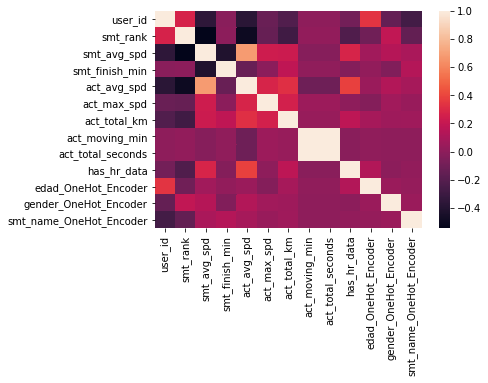

In [29]:
sns.heatmap(correladas_antes);

In [30]:
df.corr()['smt_finish_min'].abs().sort_values(ascending=False)

smt_finish_min             1.000000
smt_avg_spd                0.416118
act_total_km               0.178490
smt_name_OneHot_Encoder    0.141373
act_avg_spd                0.134065
gender_OneHot_Encoder      0.041779
has_hr_data                0.029537
edad_OneHot_Encoder        0.017069
user_id                    0.014593
act_total_seconds          0.012026
act_moving_min             0.012026
act_max_spd                0.007358
smt_rank                   0.000682
Name: smt_finish_min, dtype: float64

## Histograma de los datos de usuarios con los quantiles

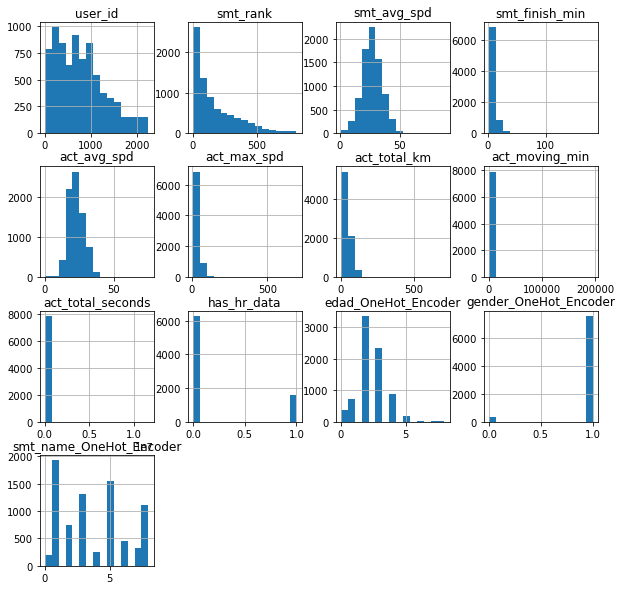

In [31]:
df.hist(bins=15, figsize = (10,10));

Text(0, 0.5, 'Total')

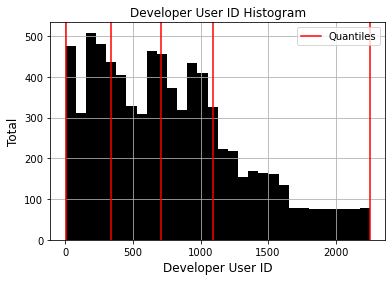

In [32]:
quantile_list = [0, .25, .5, .75, 1.]
quantiles = df["user_id"].quantile(quantile_list)

fig, ax = plt.subplots()
df["user_id"].hist(bins=30, color='black')

for quantile in quantiles:
    qvl = plt.axvline(quantile, color="r")
ax.legend([qvl], ["Quantiles"], fontsize=10)
ax.set_title("Developer User ID Histogram", fontsize=12)
ax.set_xlabel("Developer User ID", fontsize=12)
ax.set_ylabel("Total", fontsize=12)

Text(0, 0.5, 'Total')

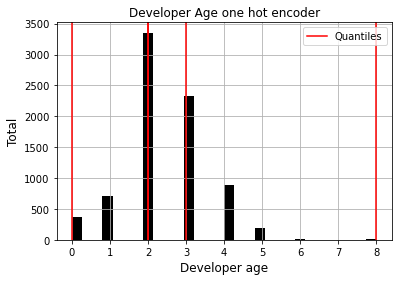

In [33]:
quantile_list = [0.,.25, .5, .75, 1.]
quantiles = df["edad_OneHot_Encoder"].quantile(quantile_list)

fig, ax = plt.subplots()
df["edad_OneHot_Encoder"].hist(bins=30, color='black')

for quantile in quantiles:
    qvl = plt.axvline(quantile, color="r")
ax.legend([qvl], ["Quantiles"], fontsize=10)
ax.set_title("Developer Age one hot encoder", fontsize=12)
ax.set_xlabel("Developer age", fontsize=12)
ax.set_ylabel("Total", fontsize=12)

C:\Users\francisco\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


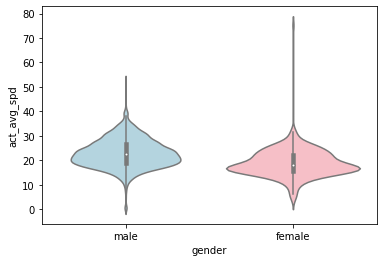

In [34]:
sns.violinplot("gender", "act_avg_spd", data=df,
               palette=["lightblue", "lightpink"]);

C:\Users\francisco\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


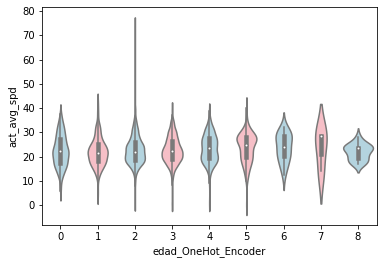

In [35]:
sns.violinplot("edad_OneHot_Encoder", "act_avg_spd", data=df,
               palette=["lightblue", "lightpink"]);

## Densidades de las variables antes de eliminar outliers

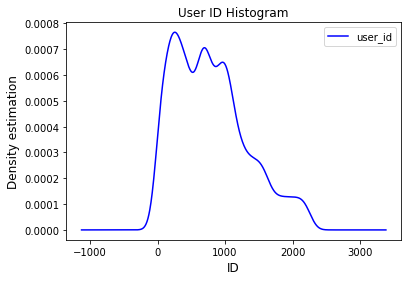

In [36]:
fig,ax = plt.subplots()
df['user_id'].plot.kde(color='blue')
ax.set_title('User ID Histogram', fontsize = 12)
ax.set_xlabel('ID', fontsize= 12)
ax.set_ylabel('Density estimation', fontsize= 12)
plt.legend();

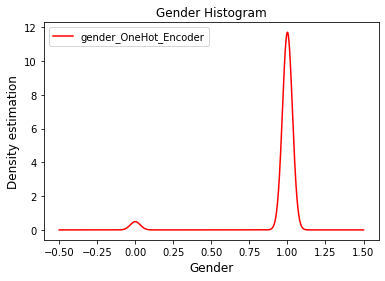

In [37]:
fig,ax = plt.subplots()
df['gender_OneHot_Encoder'].plot.kde(color='red')
ax.set_title('Gender Histogram', fontsize = 12)
ax.set_xlabel('Gender', fontsize= 12)
ax.set_ylabel('Density estimation', fontsize= 12)
plt.legend();

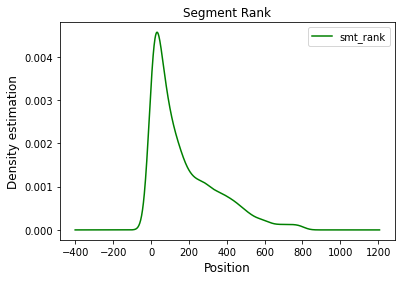

In [38]:
fig,ax = plt.subplots()
df['smt_rank'].plot.kde(color='green')
ax.set_title('Segment Rank', fontsize = 12)
ax.set_xlabel('Position', fontsize= 12)
ax.set_ylabel('Density estimation', fontsize= 12)
plt.legend();

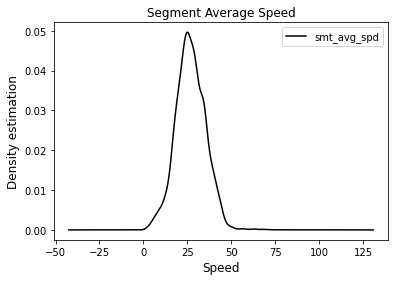

In [39]:
fig,ax = plt.subplots()
df['smt_avg_spd'].plot.kde(color='black')
ax.set_title('Segment Average Speed', fontsize = 12)
ax.set_xlabel('Speed', fontsize= 12)
ax.set_ylabel('Density estimation', fontsize= 12)
plt.legend();

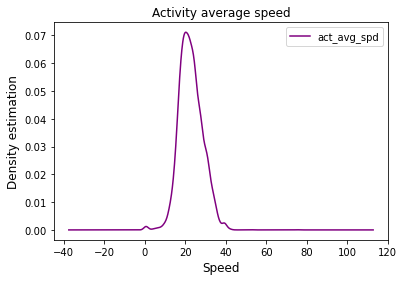

In [40]:
fig,ax = plt.subplots()
df['act_avg_spd'].plot.kde(color='purple')
ax.set_title('Activity average speed', fontsize = 12)
ax.set_xlabel('Speed', fontsize= 12)
ax.set_ylabel('Density estimation', fontsize= 12)
plt.legend();

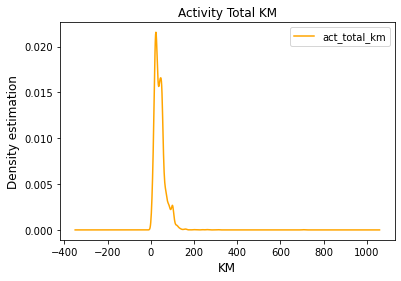

In [41]:
fig,ax = plt.subplots()
df['act_total_km'].plot.kde(color='orange')
ax.set_title('Activity Total KM', fontsize = 12)
ax.set_xlabel('KM', fontsize= 12)
ax.set_ylabel('Density estimation', fontsize= 12)
plt.legend();

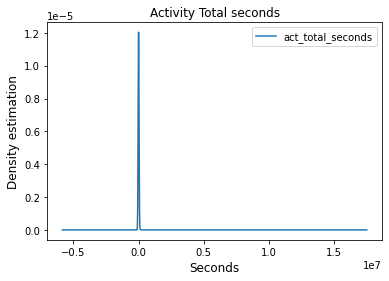

In [42]:
fig,ax = plt.subplots()
df['act_total_seconds'].plot.kde()
ax.set_title('Activity Total seconds', fontsize = 12)
ax.set_xlabel('Seconds', fontsize= 12)
ax.set_ylabel('Density estimation', fontsize= 12)
plt.legend();

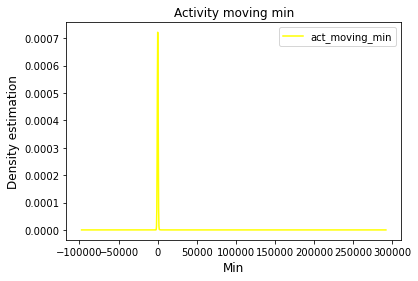

In [43]:
fig,ax = plt.subplots()
df['act_moving_min'].plot.kde(color='yellow')
ax.set_title('Activity moving min', fontsize = 12)
ax.set_xlabel('Min', fontsize= 12)
ax.set_ylabel('Density estimation', fontsize= 12)
plt.legend();

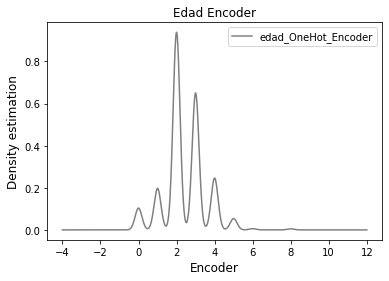

In [44]:
fig,ax = plt.subplots()
df['edad_OneHot_Encoder'].plot.kde(color='gray')
ax.set_title('Edad Encoder', fontsize = 12)
ax.set_xlabel('Encoder', fontsize= 12)
ax.set_ylabel('Density estimation', fontsize= 12)
plt.legend();

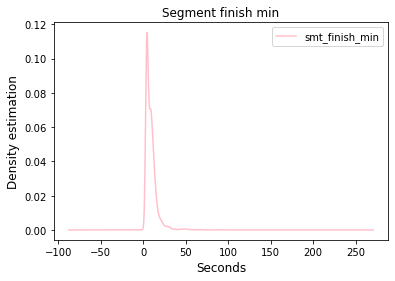

In [45]:
fig,ax = plt.subplots()
df['smt_finish_min'].plot.kde(color='pink')
ax.set_title('Segment finish min', fontsize = 12)
ax.set_xlabel('Seconds', fontsize= 12)
ax.set_ylabel('Density estimation', fontsize= 12)
plt.legend();

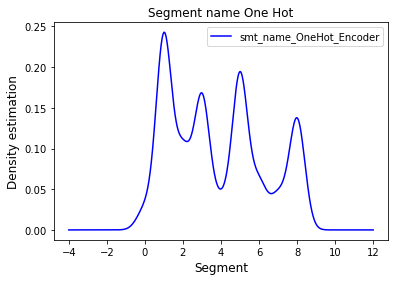

In [46]:
fig,ax = plt.subplots()
df['smt_name_OneHot_Encoder'].plot.kde(color='blue')
ax.set_title('Segment name One Hot', fontsize = 12)
ax.set_xlabel('Segment', fontsize= 12)
ax.set_ylabel('Density estimation', fontsize= 12)
plt.legend();

## Outliers
#### En primer lugar lo haremos por actividad

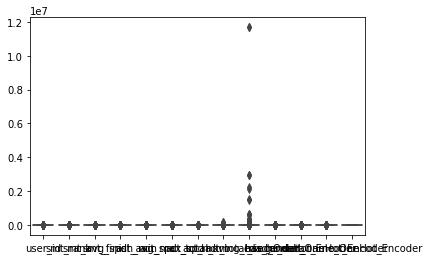

In [47]:
sns.boxplot(data=df);

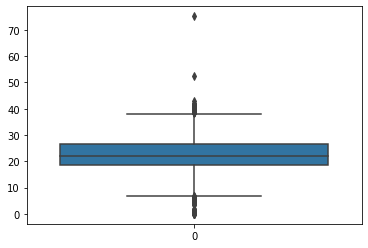

In [48]:
#act_avg_spd
sns.boxplot(data=df['act_avg_spd']);

In [49]:
df[df['act_avg_spd'] <6] = np.nan
df[df['act_avg_spd'] >40] = np.nan

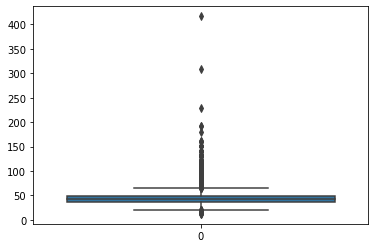

In [50]:
#act_max_spd
sns.boxplot(data=df['act_max_spd']);

In [51]:
df[df['act_max_spd'] >66] = np.nan
df[df['act_max_spd'] < 20] = np.nan

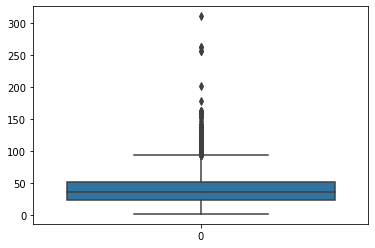

In [52]:
#act_total_km
sns.boxplot(data=df['act_total_km']);

In [53]:
df[df['act_total_km'] >100] = np.nan

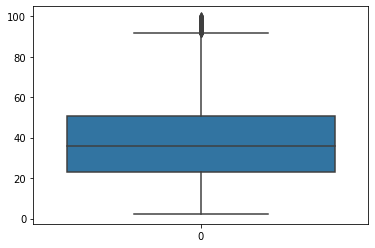

In [54]:
#Me resulta extraño que todos los outliers estén por encima en tiempo y no por debajo.
sns.boxplot(data=df['act_total_km']);

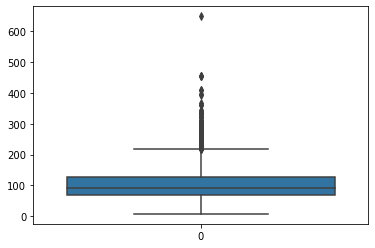

In [55]:
#smt_finish_minuts
sns.boxplot(data=df['act_moving_min']);

In [56]:
df[df['act_moving_min'] >250] = np.nan

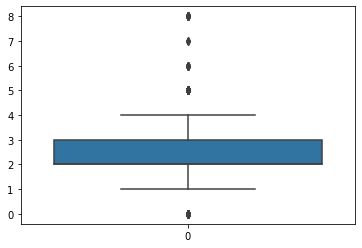

In [57]:
#smt_finish_minuts
sns.boxplot(data=df['edad_OneHot_Encoder']);

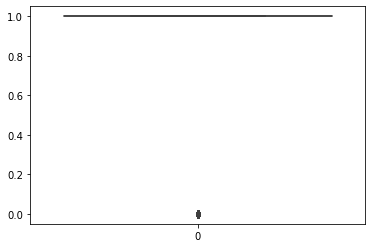

In [58]:
#smt_finish_minuts
sns.boxplot(data=df['gender_OneHot_Encoder']);

### Boxplot por segmentos

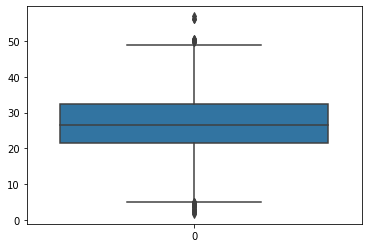

In [59]:
# smt_avg_spd
sns.boxplot(data=df['smt_avg_spd']);

In [60]:
df[df['smt_avg_spd'] >53] = np.nan

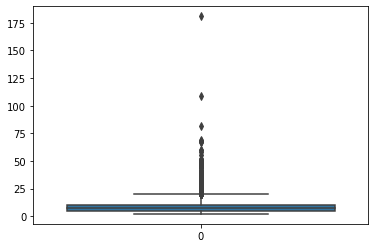

In [61]:
#smt_finish_minuts
sns.boxplot(data=df['smt_finish_min']);

In [62]:
df[df['smt_finish_min'] >20.5] = np.nan

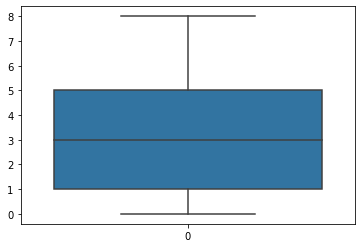

In [63]:
#smt_name_OneHot_Encoder
sns.boxplot(data=df['smt_name_OneHot_Encoder']);

In [64]:
df.dropna(axis = 0, inplace=True)

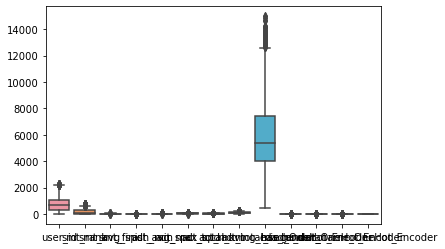

In [65]:
sns.boxplot(data=df);

## Densidades de las variables después de eliminar outliers

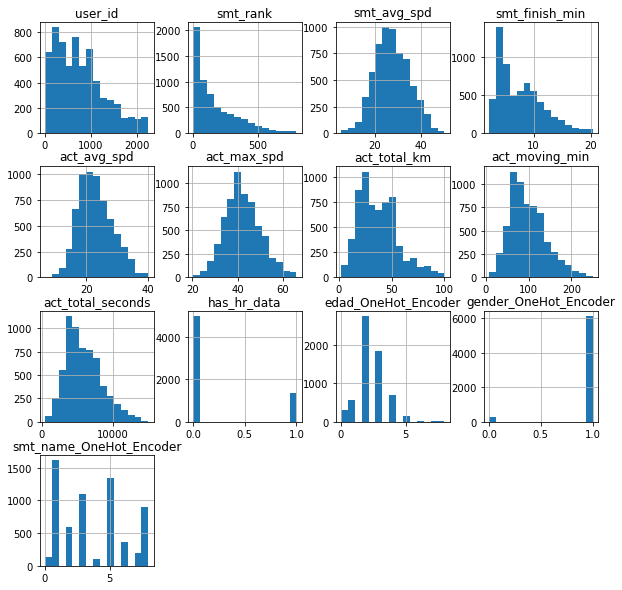

In [66]:
df.hist(bins=15, figsize = (10,10));

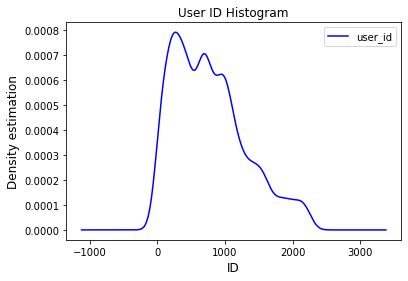

In [67]:
fig,ax = plt.subplots()
df['user_id'].plot.kde(color='blue')
ax.set_title('User ID Histogram', fontsize = 12)
ax.set_xlabel('ID', fontsize= 12)
ax.set_ylabel('Density estimation', fontsize= 12)
plt.legend();

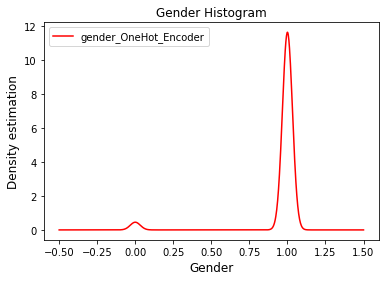

In [68]:
fig,ax = plt.subplots()
df['gender_OneHot_Encoder'].plot.kde(color='red')
ax.set_title('Gender Histogram', fontsize = 12)
ax.set_xlabel('Gender', fontsize= 12)
ax.set_ylabel('Density estimation', fontsize= 12)
plt.legend();

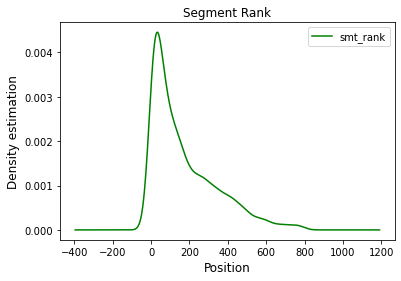

In [69]:
fig,ax = plt.subplots()
df['smt_rank'].plot.kde(color='green')
ax.set_title('Segment Rank', fontsize = 12)
ax.set_xlabel('Position', fontsize= 12)
ax.set_ylabel('Density estimation', fontsize= 12)
plt.legend();

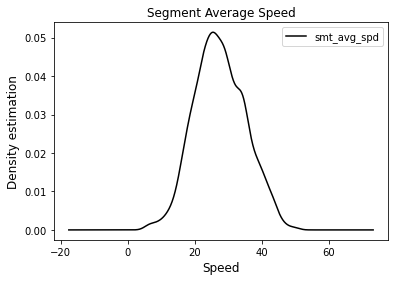

In [70]:
fig,ax = plt.subplots()
df['smt_avg_spd'].plot.kde(color='black')
ax.set_title('Segment Average Speed', fontsize = 12)
ax.set_xlabel('Speed', fontsize= 12)
ax.set_ylabel('Density estimation', fontsize= 12)
plt.legend();

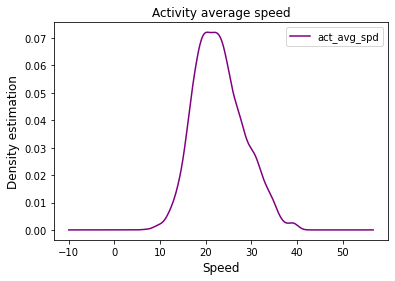

In [71]:

fig,ax = plt.subplots()
df['act_avg_spd'].plot.kde(color='purple')
ax.set_title('Activity average speed', fontsize = 12)
ax.set_xlabel('Speed', fontsize= 12)
ax.set_ylabel('Density estimation', fontsize= 12)
plt.legend();

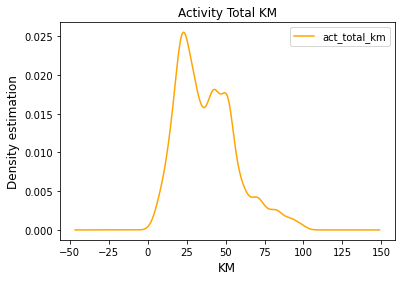

In [72]:
fig,ax = plt.subplots()
df['act_total_km'].plot.kde(color='orange')
ax.set_title('Activity Total KM', fontsize = 12)
ax.set_xlabel('KM', fontsize= 12)
ax.set_ylabel('Density estimation', fontsize= 12)
plt.legend();

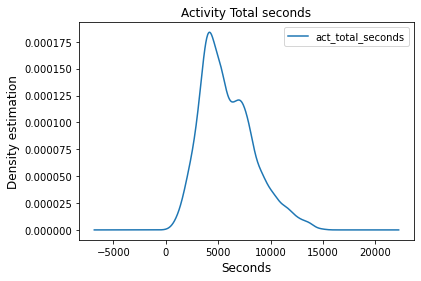

In [73]:
fig,ax = plt.subplots()
df['act_total_seconds'].plot.kde()
ax.set_title('Activity Total seconds', fontsize = 12)
ax.set_xlabel('Seconds', fontsize= 12)
ax.set_ylabel('Density estimation', fontsize= 12)
plt.legend();

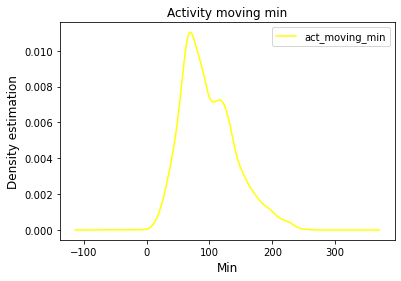

In [74]:
fig,ax = plt.subplots()
df['act_moving_min'].plot.kde(color='yellow')
ax.set_title('Activity moving min', fontsize = 12)
ax.set_xlabel('Min', fontsize= 12)
ax.set_ylabel('Density estimation', fontsize= 12)
plt.legend();

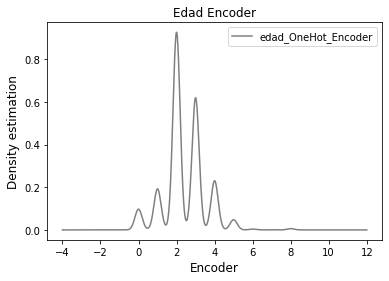

In [75]:
fig,ax = plt.subplots()
df['edad_OneHot_Encoder'].plot.kde(color='gray')
ax.set_title('Edad Encoder', fontsize = 12)
ax.set_xlabel('Encoder', fontsize= 12)
ax.set_ylabel('Density estimation', fontsize= 12)
plt.legend();

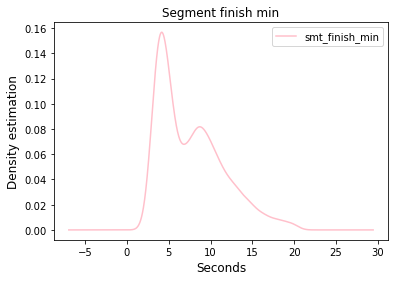

In [76]:
fig,ax = plt.subplots()
df['smt_finish_min'].plot.kde(color='pink')
ax.set_title('Segment finish min', fontsize = 12)
ax.set_xlabel('Seconds', fontsize= 12)
ax.set_ylabel('Density estimation', fontsize= 12)
plt.legend();

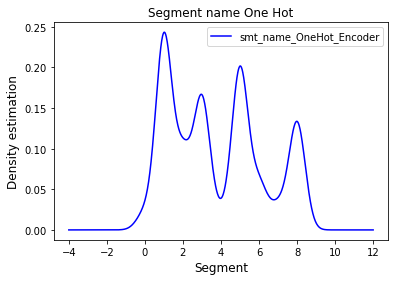

In [77]:
fig,ax = plt.subplots()
df['smt_name_OneHot_Encoder'].plot.kde(color='blue')
ax.set_title('Segment name One Hot', fontsize = 12)
ax.set_xlabel('Segment', fontsize= 12)
ax.set_ylabel('Density estimation', fontsize= 12)
plt.legend();

## Correlación tras quitar outliers

In [78]:
correladas_despues = df.corr()
correladas_despues

user_id  smt_rank  smt_avg_spd  smt_finish_min  \
user_id                  1.000000  0.260730    -0.375071       -0.040387   
smt_rank                 0.260730  1.000000    -0.605758        0.015932   
smt_avg_spd             -0.375071 -0.605758     1.000000       -0.269497   
smt_finish_min          -0.040387  0.015932    -0.269497        1.000000   
act_avg_spd             -0.374785 -0.539472     0.755125       -0.086451   
act_max_spd             -0.317094 -0.304025     0.535854       -0.095196   
act_total_km            -0.290399 -0.352481     0.404737        0.162461   
act_moving_min          -0.166354 -0.138677     0.086479        0.217674   
act_total_seconds       -0.166354 -0.138677     0.086479        0.217674   
has_hr_data             -0.076382 -0.230109     0.309864       -0.008013   
edad_OneHot_Encoder      0.350363 -0.100360     0.077635        0.019742   
gender_OneHot_Encoder   -0.143000  0.187091     0.148672       -0.038162   
smt_name_OneHot_Encoder -0.267917 -0.146492     0.119346        0.187853   

                         act_avg_spd  act_max_spd  act_total_km  \
user_id                    -0.374785    -0.317094     -0.290399   
smt_rank                   -0.539472    -0.304025     -0.352481   
smt_avg_spd                 0.755125     0.535854      0.404737   
smt_finish_min             -0.086451    -0.095196      0.162461   
act_avg_spd                 1.000000     0.530038      0.499477   
act_max_spd                 0.530038     1.000000      0.373763   
act_total_km                0.499477     0.373763      1.000000   
act_moving_min              0.061991     0.172677      0.871551   
act_total_seconds           0.061991     0.172677      0.871551   
has_hr_data                 0.397379     0.150867      0.235711   
edad_OneHot_Encoder         0.068147    -0.080322      0.088604   
gender_OneHot_Encoder       0.133070     0.191665      0.085948   
smt_name_OneHot_Encoder     0.099415     0.087916      0.083610   

                         act_moving_min  act_total_seconds  has_hr_data  \
user_id                       -0.166354          -0.166354    -0.076382   
smt_rank                      -0.138677          -0.138677    -0.230109   
smt_avg_spd                    0.086479           0.086479     0.309864   
smt_finish_min                 0.217674           0.217674    -0.008013   
act_avg_spd                    0.061991           0.061991     0.397379   
act_max_spd                    0.172677           0.172677     0.150867   
act_total_km                   0.871551           0.871551     0.235711   
act_moving_min                 1.000000           1.000000     0.053573   
act_total_seconds              1.000000           1.000000     0.053573   
has_hr_data                    0.053573           0.053573     1.000000   
edad_OneHot_Encoder            0.064834           0.064834     0.139475   
gender_OneHot_Encoder          0.032945           0.032945    -0.010071   
smt_name_OneHot_Encoder        0.067204           0.067204     0.028155   

                         edad_OneHot_Encoder  gender_OneHot_Encoder  \
user_id                             0.350363              -0.143000   
smt_rank                           -0.100360               0.187091   
smt_avg_spd                         0.077635               0.148672   
smt_finish_min                      0.019742              -0.038162   
act_avg_spd                         0.068147               0.133070   
act_max_spd                        -0.080322               0.191665   
act_total_km                        0.088604               0.085948   
act_moving_min                      0.064834               0.032945   
act_total_seconds                   0.064834               0.032945   
has_hr_data                         0.139475              -0.010071   
edad_OneHot_Encoder                 1.000000               0.040887   
gender_OneHot_Encoder               0.040887               1.000000   
smt_name_OneHot_Encoder             0.025621    

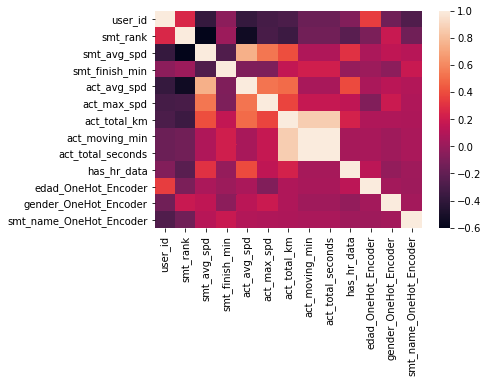

In [79]:
sns.heatmap(correladas_despues);

# INTENTO DE ESTANDARIZACIÓN

In [80]:
####  Estandarizado
df_scale = preprocessing.StandardScaler().fit(df[['user_id', 'smt_rank','smt_avg_spd','act_avg_spd', 'act_max_spd', 'act_total_km',
       'act_moving_min', 'act_total_seconds', 'edad_OneHot_Encoder', 'gender_OneHot_Encoder','smt_name_OneHot_Encoder','smt_finish_min']]) 

df_std = df_scale.transform(df[['user_id', 'smt_rank','smt_avg_spd','act_avg_spd', 'act_max_spd', 'act_total_km',
       'act_moving_min', 'act_total_seconds', 'edad_OneHot_Encoder', 'gender_OneHot_Encoder','smt_name_OneHot_Encoder','smt_finish_min']]) 



In [81]:
type(df_scale)

sklearn.preprocessing._data.StandardScaler

In [82]:
type(df_std)

numpy.ndarray

In [83]:
print('La media antes de la estandarzación:' + '\n'+ str(round(df.mean(),2)))

La media antes de la estandarzación:
user_id                     768.47
smt_rank                    171.47
smt_avg_spd                  27.49
smt_finish_min                7.66
act_avg_spd                  22.97
act_max_spd                  42.10
act_total_km                 37.79
act_moving_min               98.09
act_total_seconds          5885.12
has_hr_data                   0.21
edad_OneHot_Encoder           2.42
gender_OneHot_Encoder         0.96
smt_name_OneHot_Encoder       3.78
dtype: float64


In [84]:
print('La desviación típica antes de la estandarzación:' + '\n'+ str(round(df.std(),2)))

La desviación típica antes de la estandarzación:
user_id                     536.40
smt_rank                    169.04
smt_avg_spd                   7.60
smt_finish_min                3.90
act_avg_spd                   5.44
act_max_spd                   7.90
act_total_km                 18.77
act_moving_min               42.25
act_total_seconds          2535.23
has_hr_data                   0.41
edad_OneHot_Encoder           1.08
gender_OneHot_Encoder         0.19
smt_name_OneHot_Encoder       2.47
dtype: float64


In [85]:
print('La media tras la estandarzación:' + '\n'+ str(round(df_std.mean(),1)))

La media tras la estandarzación:
-0.0


In [86]:
print('La desviación típica tras la estandarzación:' + '\n'+  str(round(df_std.std(),1)))

La desviación típica tras la estandarzación:
1.0


In [87]:
df_std = pd.DataFrame(data = df_std, columns=['user_id', 'smt_rank','smt_avg_spd','act_avg_spd', 'act_max_spd', 'act_total_km',
       'act_moving_min', 'act_total_seconds', 'edad_OneHot_Encoder', 'gender_OneHot_Encoder','smt_name_OneHot_Encoder','smt_finish_min'])

## Visualización de algunos datos

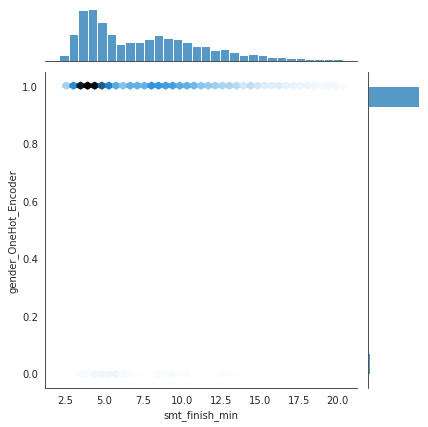

In [88]:
with sns.axes_style('white'):
    sns.jointplot(x = df['smt_finish_min'],y =df['gender_OneHot_Encoder'], kind='hex')

C:\Users\francisco\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


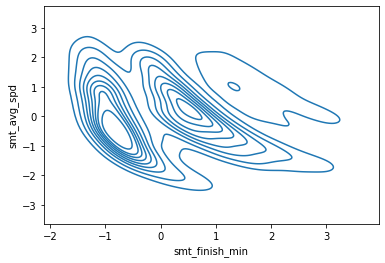

In [89]:
sns.kdeplot(df_std['smt_finish_min'],df_std['smt_avg_spd']);

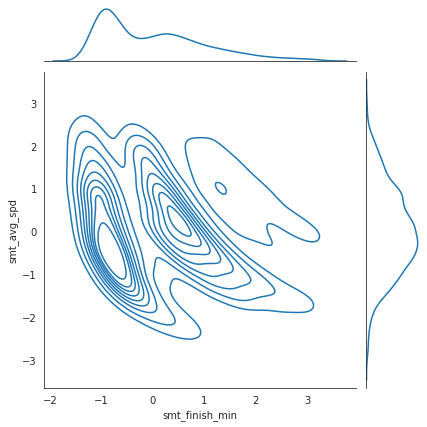

In [90]:
with sns.axes_style('white'):
    sns.jointplot(x = df_std['smt_finish_min'],y =df_std['smt_avg_spd'],  kind = 'kde')

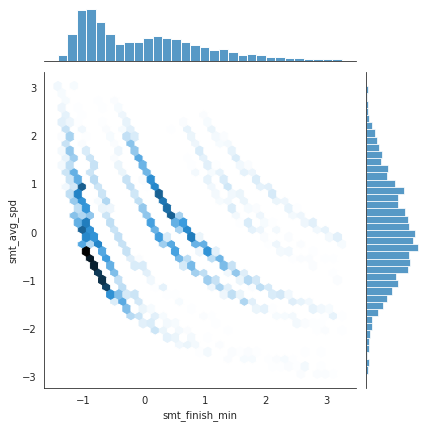

In [91]:
with sns.axes_style('white'):
    sns.jointplot(x = df_std['smt_finish_min'],y =df_std['smt_avg_spd'], kind='hex')

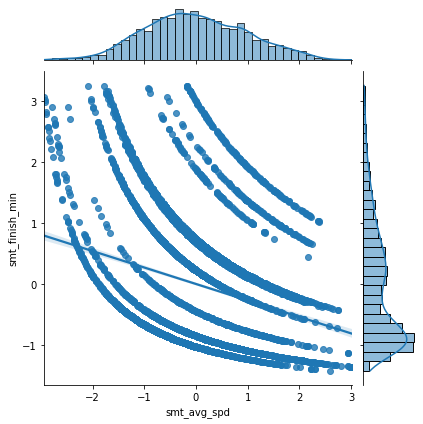

In [92]:
sns.jointplot( x =df_std['smt_avg_spd'],y = df_std['smt_finish_min'], kind = 'reg')

C:\Users\francisco\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\francisco\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\francisco\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\francisco\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


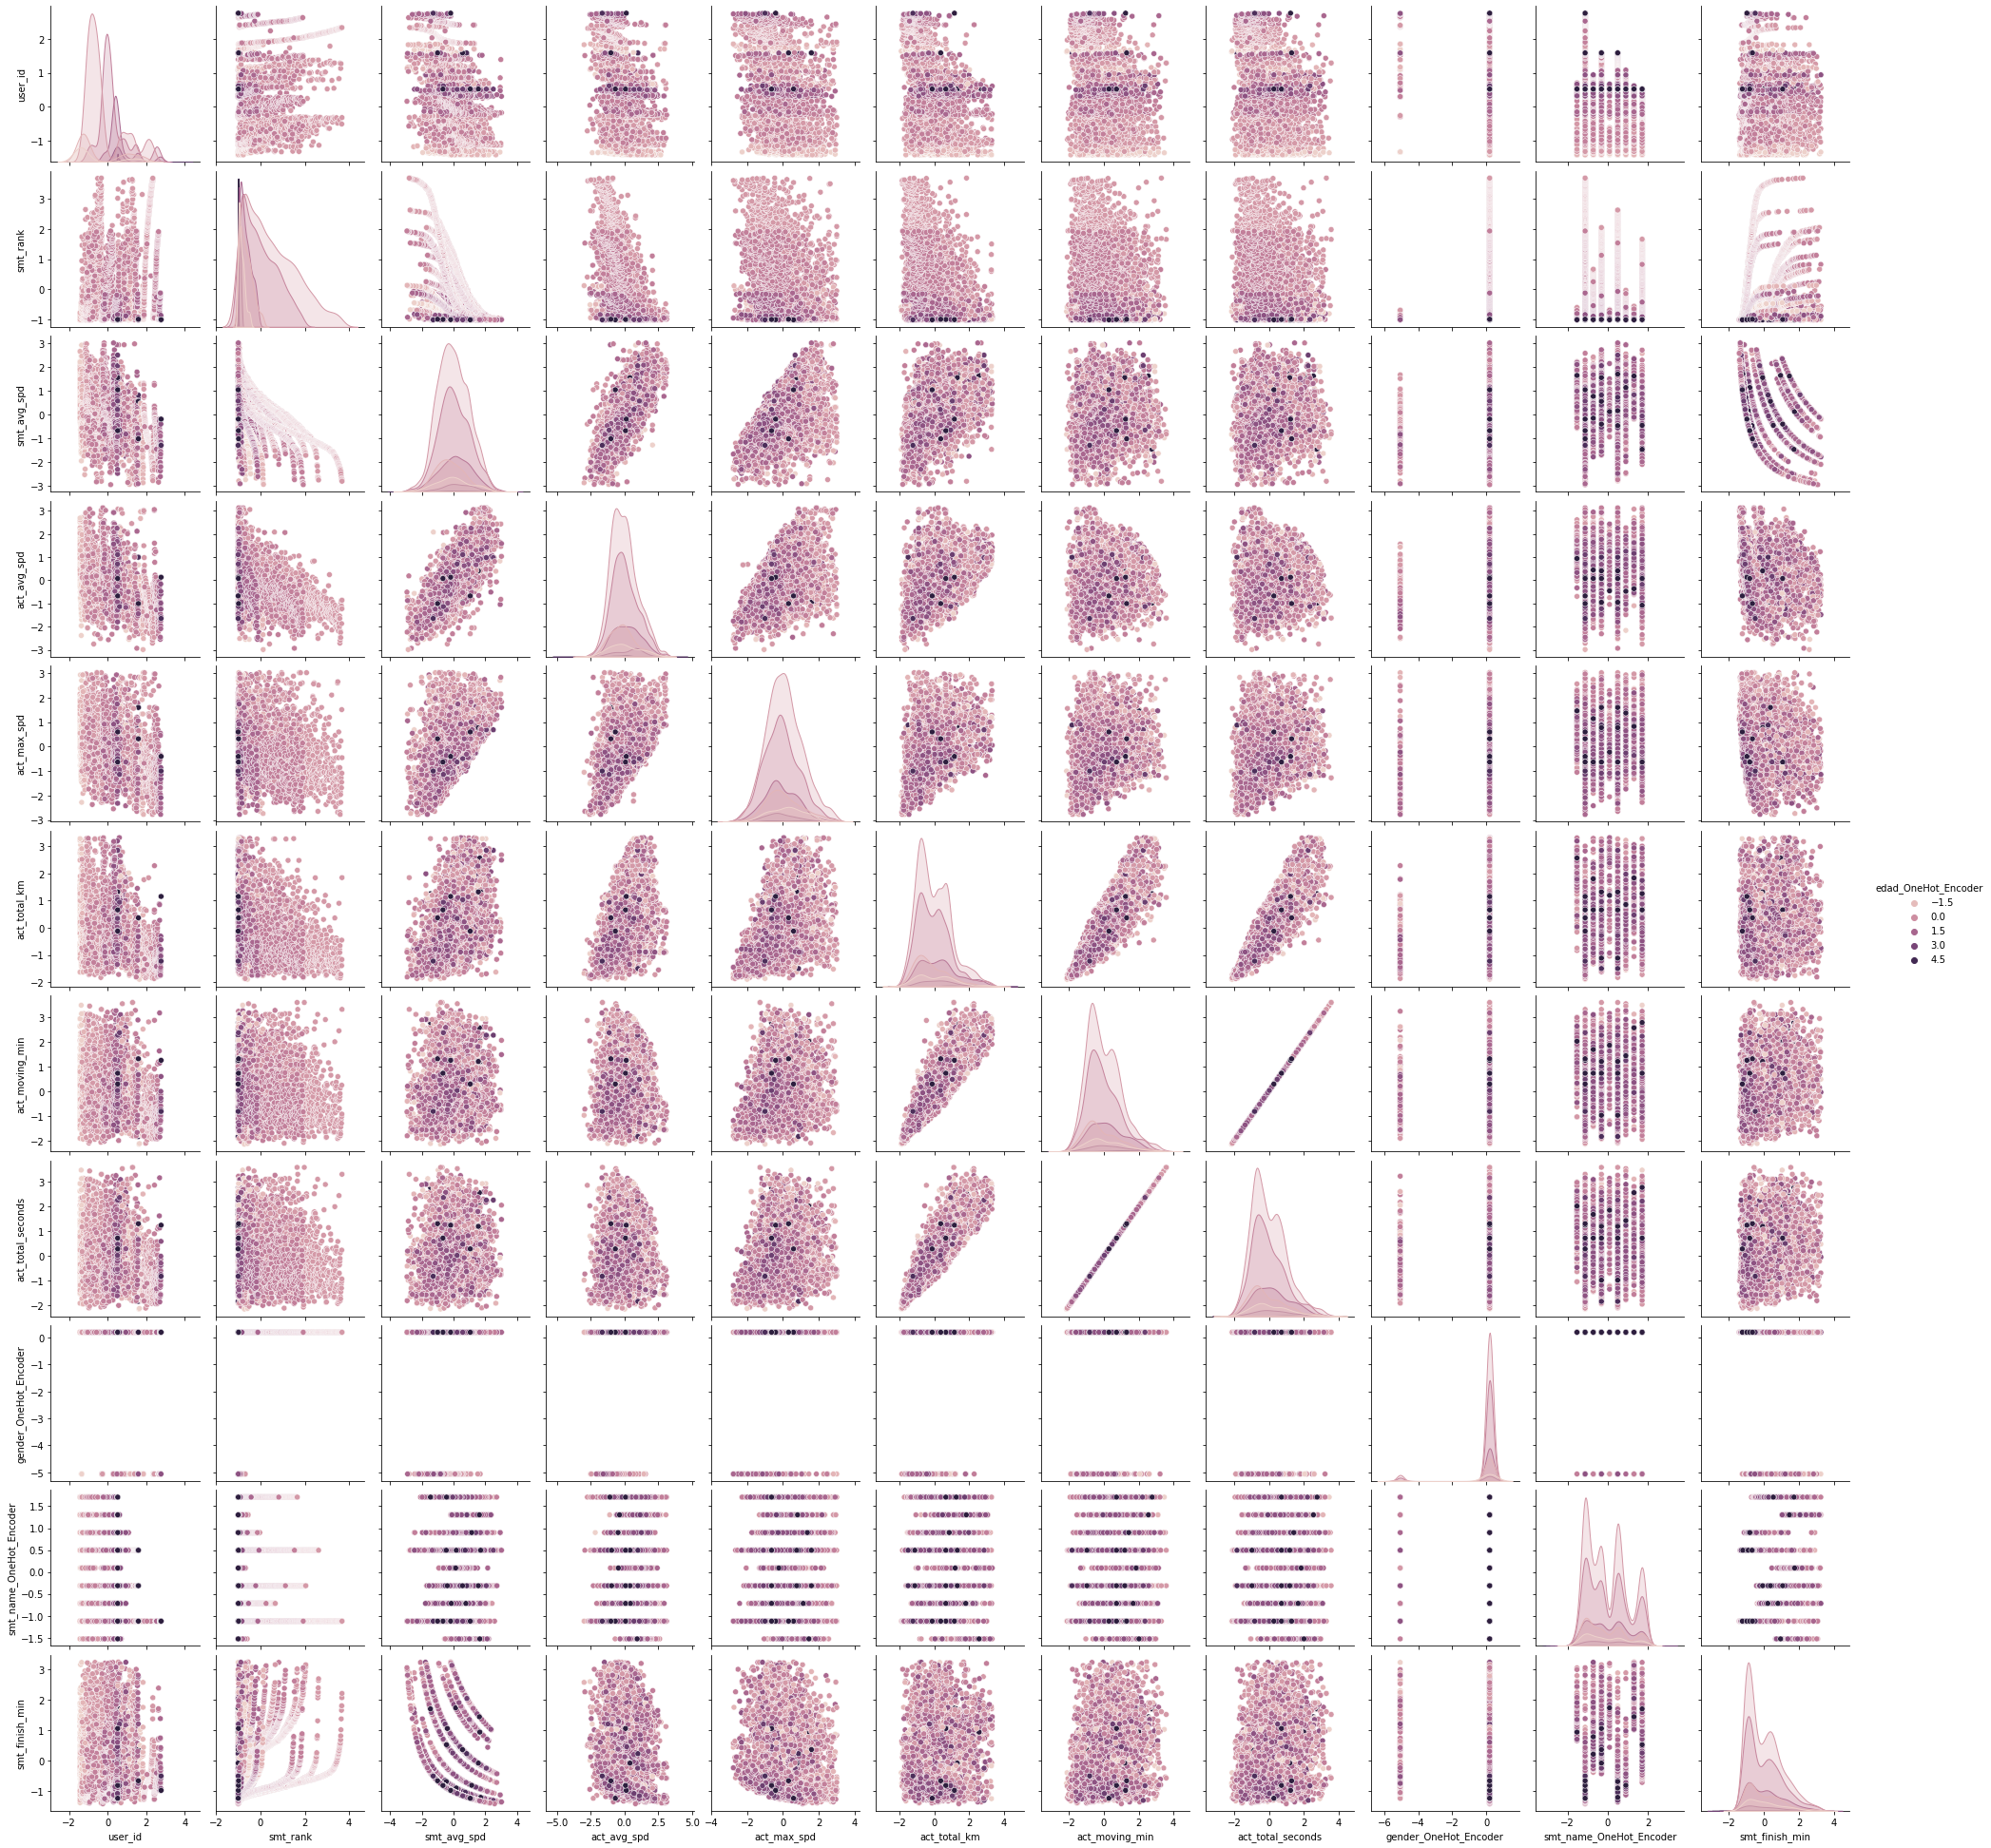

In [94]:
sns.pairplot(df_std, hue='edad_OneHot_Encoder', height=2.5); 

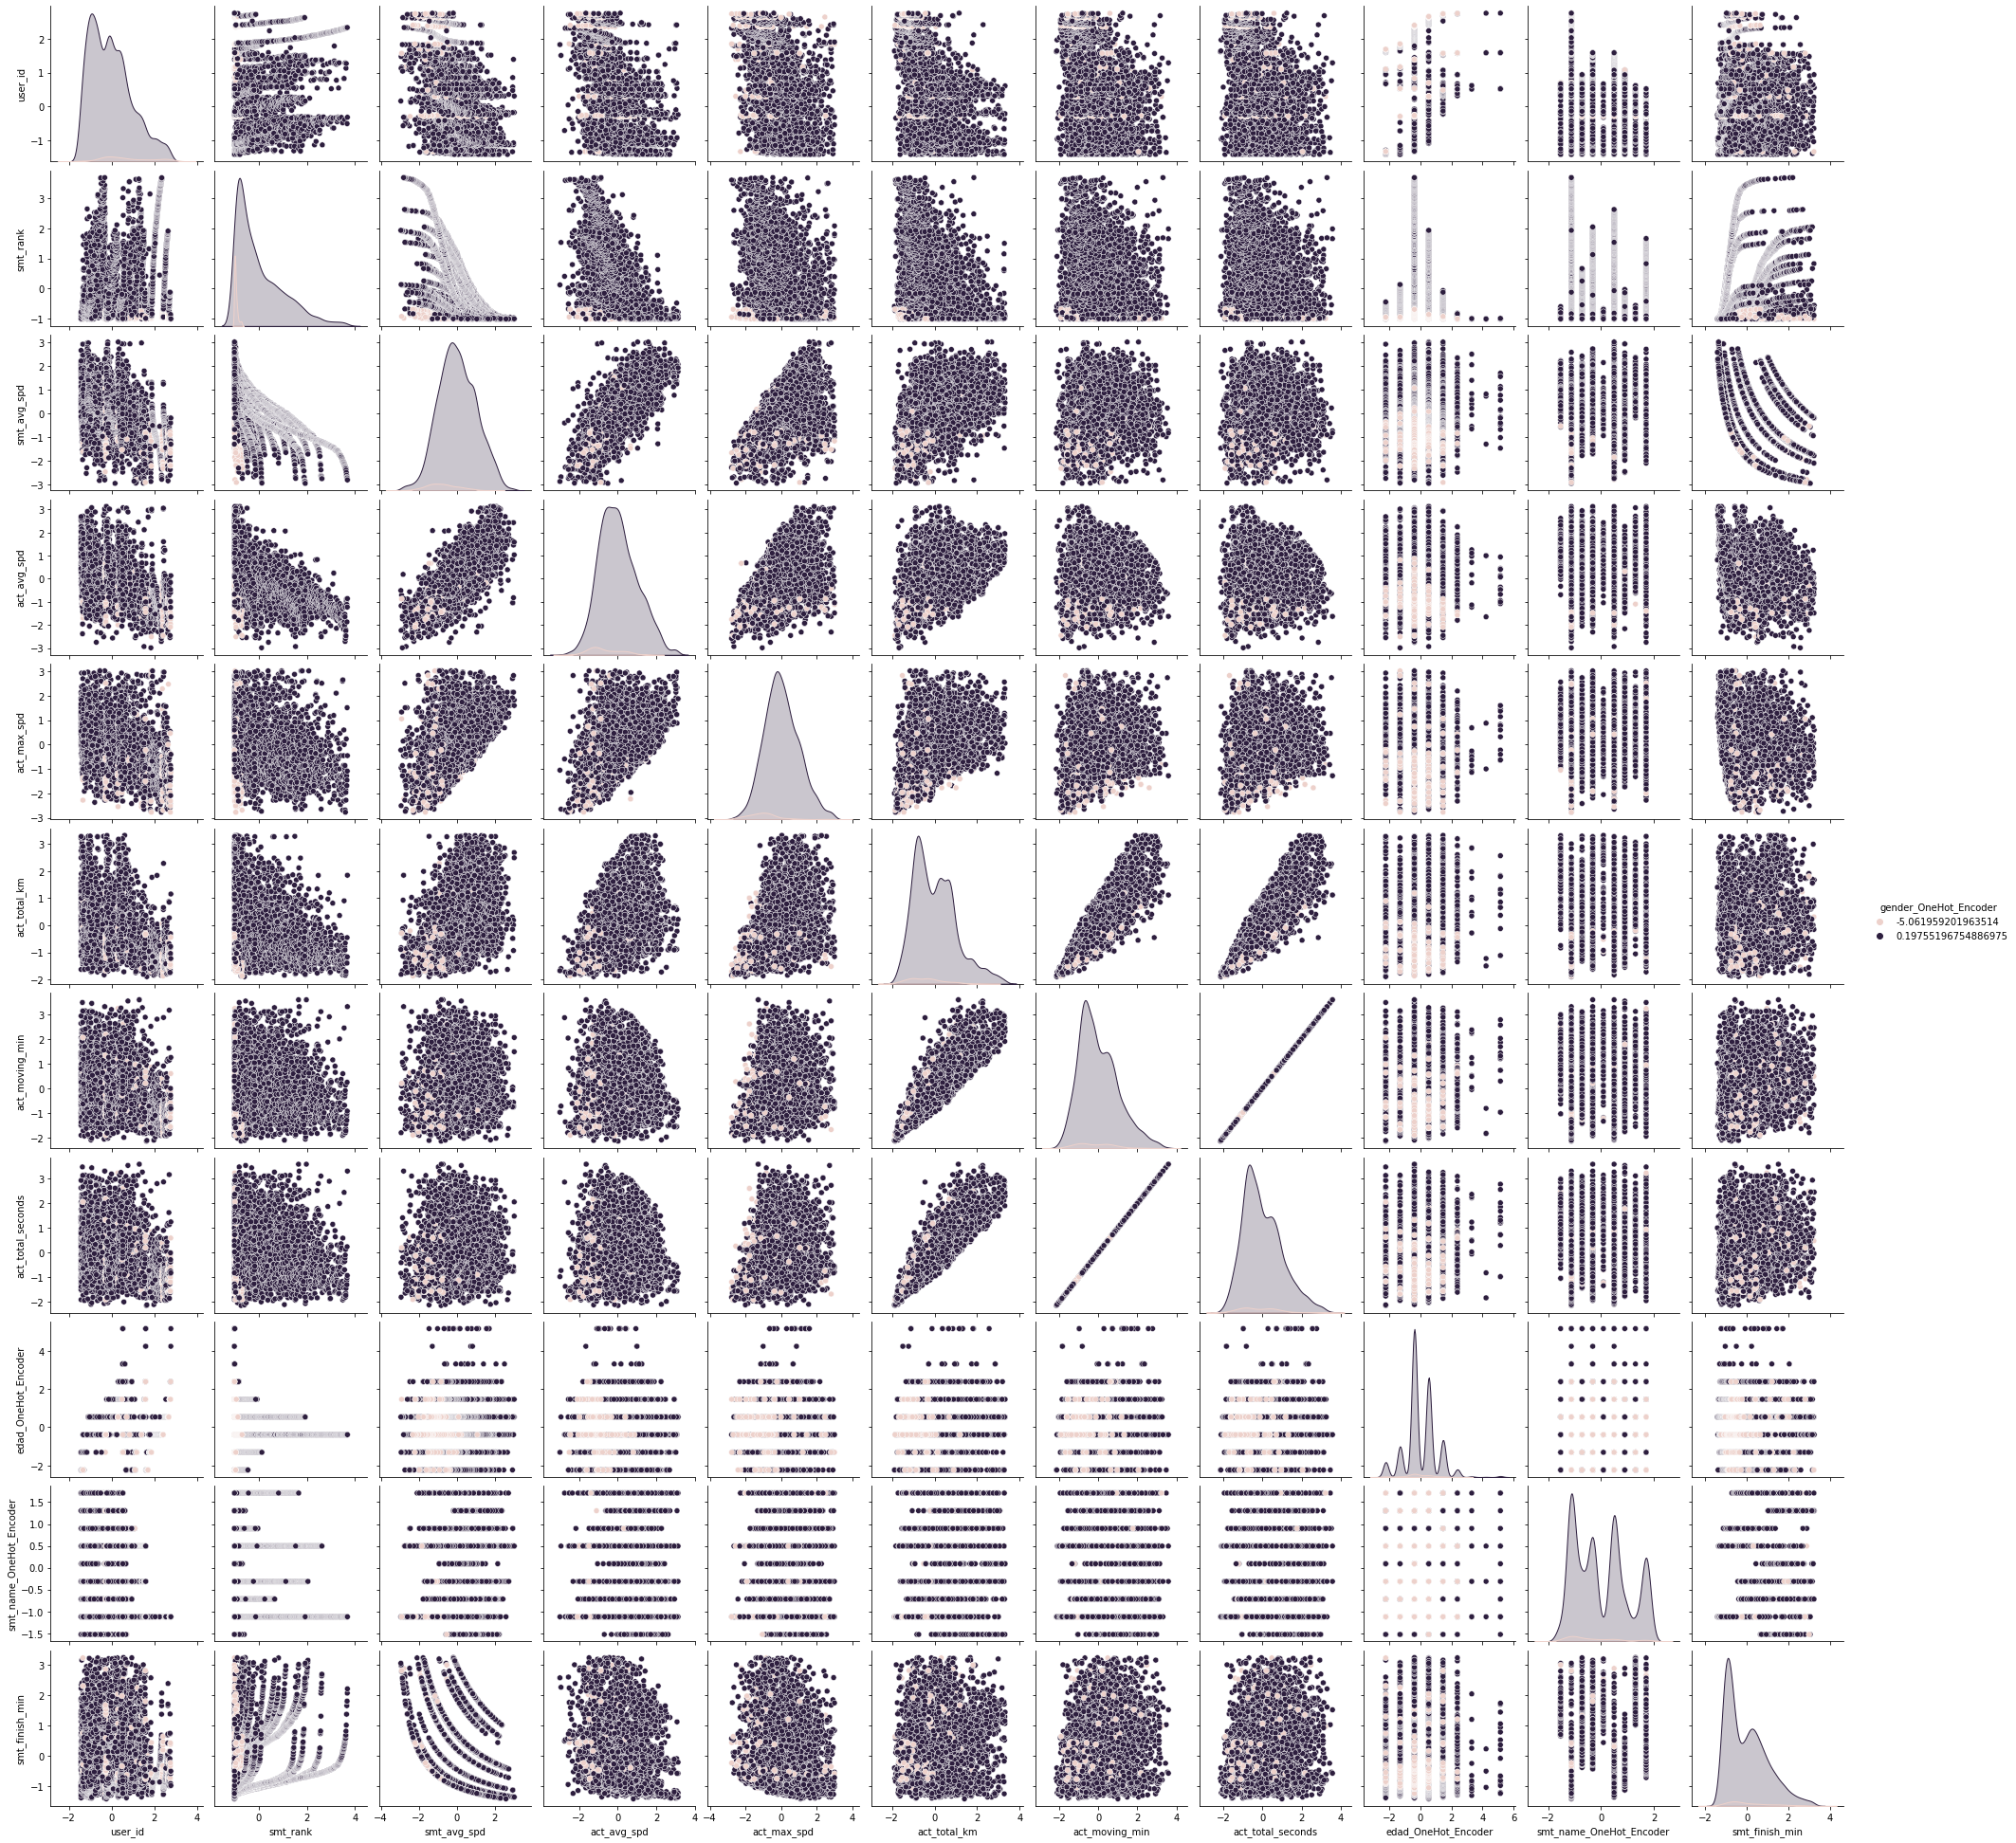

In [95]:
sns.pairplot(df_std, hue='gender_OneHot_Encoder', height=2.5);

## División entre entre datos de Test y Train 

Hacemos la división de los datos entre 'Train' y 'Test', para entrenar y testear nuestro modelo.


In [96]:
df.columns

Index(['user_age_group', 'user_id', 'attempt_date', 'gender', 'smt_rank',
       'smt_avg_spd', 'smt_finish_min', 'smt_name', 'user_weight_category',
       'act_title', 'act_avg_spd', 'act_max_spd', 'act_total_km',
       'act_moving_min', 'act_total_seconds', 'has_hr_data',
       'edad_OneHot_Encoder', 'gender_OneHot_Encoder',
       'smt_name_OneHot_Encoder'],
      dtype='object')

In [97]:
X = df[['user_id', 'smt_rank','smt_avg_spd','act_avg_spd', 'act_max_spd', 'act_total_km',
       'act_moving_min', 'act_total_seconds', 'edad_OneHot_Encoder', 'gender_OneHot_Encoder','smt_name_OneHot_Encoder']]
y = df['smt_finish_min']

In [98]:
# Lo dejo comentado para futuras pruebas
#X = df[['smt_avg_spd', 'act_max_spd', 'act_moving_min', 'act_total_seconds', 'edad_OneHot_Encoder', 'gender_OneHot_Encoder']]
#y = df['smt_finish_min']

In [99]:
#Barajamos los datos de manera aleatoria, cogiendo para X_train e y_train el 80% de los datos y para X_test el 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [100]:
print('Total train features shape:', X_train.shape)
print('Total train target shape:', y_train.shape)
print('Total test features shape:', X_test.shape)
print('Total test target shape:', y_test.shape)

Total train features shape: (5090, 11)
Total train target shape: (5090,)
Total test features shape: (1273, 11)
Total test target shape: (1273,)


In [101]:
X_train.columns

Index(['user_id', 'smt_rank', 'smt_avg_spd', 'act_avg_spd', 'act_max_spd',
       'act_total_km', 'act_moving_min', 'act_total_seconds',
       'edad_OneHot_Encoder', 'gender_OneHot_Encoder',
       'smt_name_OneHot_Encoder'],
      dtype='object')

In [102]:
X_train.head()

user_id  smt_rank  smt_avg_spd  act_avg_spd  act_max_spd  act_total_km  \
5185   1484.0     390.0         24.4         18.1         43.6         25.34   
7439    803.0     312.0         21.8         20.9         34.2         24.92   
3980    673.0      11.0         45.4         27.1         52.6         40.09   
1095    981.0      16.0         21.3         18.9         36.0         23.06   
6092     82.0      41.0         26.4         25.9         37.4         59.13   

      act_moving_min  act_total_seconds  edad_OneHot_Encoder  \
5185       84.050000             5043.0                  2.0   
7439       71.583333             4295.0                  3.0   
3980       88.716667             5323.0                  3.0   
1095       73.233333             4394.0                  5.0   
6092      136.816667             8209.0                  1.0   

      gender_OneHot_Encoder  smt_name_OneHot_Encoder  
5185                    1.0                      3.0  
7439                    1.0                      1.0  
3980                    1.0                      5.0  
1095                    1.0                      8.0  
6092                    1.0                      1.0

In [103]:
X_train.shape

(5090, 11)

In [104]:
y_train.shape

(5090,)

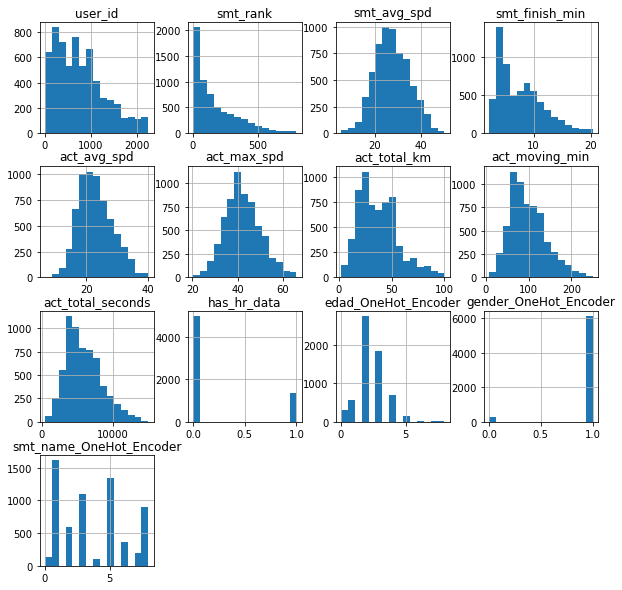

In [105]:
df.hist(bins=15, figsize = (10,10));

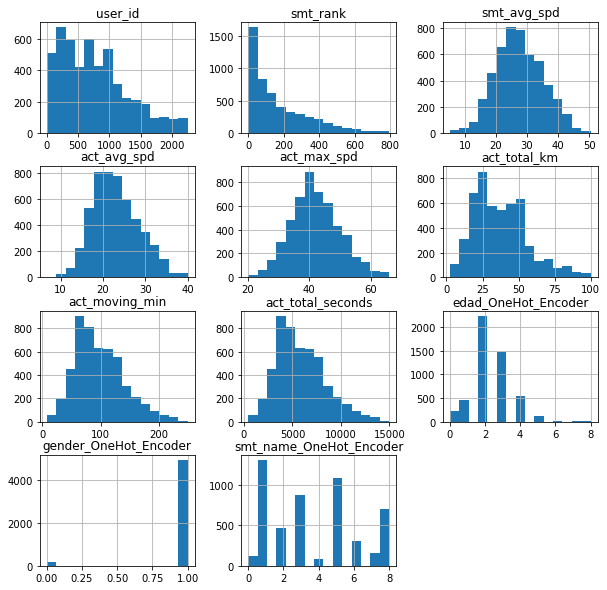

In [106]:
#Obtenemos los histogramas de todas las variables de X_train, y poder ver las distribuciones de ellas.
X_train.hist(bins=15, figsize = (10,10));

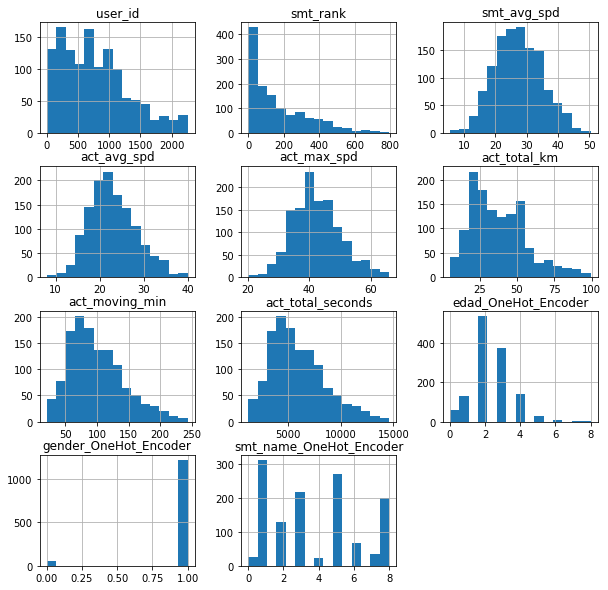

In [107]:
X_test.hist(bins=15, figsize = (10,10));

## Correlación en X_train

In [108]:
correladas = X_train.corr()
correladas

user_id  smt_rank  smt_avg_spd  act_avg_spd  \
user_id                  1.000000  0.257467    -0.382109    -0.385688   
smt_rank                 0.257467  1.000000    -0.610425    -0.540352   
smt_avg_spd             -0.382109 -0.610425     1.000000     0.754156   
act_avg_spd             -0.385688 -0.540352     0.754156     1.000000   
act_max_spd             -0.331870 -0.316058     0.543720     0.536010   
act_total_km            -0.304370 -0.350613     0.404211     0.504928   
act_moving_min          -0.175432 -0.134023     0.084547     0.066715   
act_total_seconds       -0.175432 -0.134023     0.084547     0.066715   
edad_OneHot_Encoder      0.344206 -0.103806     0.071242     0.056857   
gender_OneHot_Encoder   -0.138433  0.180090     0.153586     0.136139   
smt_name_OneHot_Encoder -0.262130 -0.152734     0.128188     0.109372   

                         act_max_spd  act_total_km  act_moving_min  \
user_id                    -0.331870     -0.304370       -0.175432   
smt_rank                   -0.316058     -0.350613       -0.134023   
smt_avg_spd                 0.543720      0.404211        0.084547   
act_avg_spd                 0.536010      0.504928        0.066715   
act_max_spd                 1.000000      0.385217        0.184051   
act_total_km                0.385217      1.000000        0.870799   
act_moving_min              0.184051      0.870799        1.000000   
act_total_seconds           0.184051      0.870799        1.000000   
edad_OneHot_Encoder        -0.086512      0.078240        0.061679   
gender_OneHot_Encoder       0.188551      0.084129        0.029656   
smt_name_OneHot_Encoder     0.089278      0.095683        0.077057   

                         act_total_seconds  edad_OneHot_Encoder  \
user_id                          -0.175432             0.344206   
smt_rank                         -0.134023            -0.103806   
smt_avg_spd                       0.084547             0.071242   
act_avg_spd                       0.066715             0.056857   
act_max_spd                       0.184051            -0.086512   
act_total_km                      0.870799             0.078240   
act_moving_min                    1.000000             0.061679   
act_total_seconds                 1.000000             0.061679   
edad_OneHot_Encoder               0.061679             1.000000   
gender_OneHot_Encoder             0.029656             0.034142   
smt_name_OneHot_Encoder           0.077057             0.034095   

                         gender_OneHot_Encoder  smt_name_OneHot_Encoder  
user_id                              -0.138433                -0.262130  
smt_rank                              0.180090                -0.152734  
smt_avg_spd                           0.153586                 0.128188  
act_avg_spd                           0.136139                 0.109372  
act_max_spd                           0.188551                 0.089278  
act_total_km                          0.084129                 0.095683  
act_moving_min                        0.029656                 0.077057  
act_total_seconds                     0.029656                 0.077057  
edad_OneHot_Encoder                   0.034142                 0.034095  
gender_OneHot_Encoder                 1.000000                 0.031422  
smt_name_OneHot_Encoder               0.031422                 1.000000

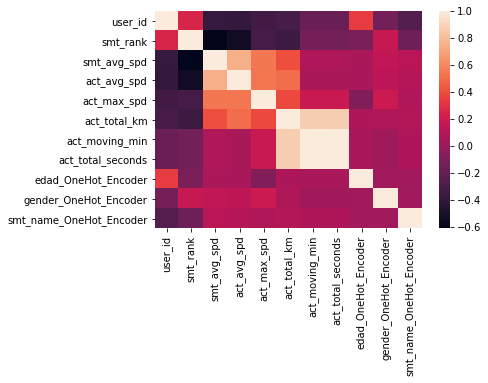

In [109]:
sns.heatmap(correladas);

In [110]:
df.corr()['smt_finish_min'].abs().sort_values(ascending=False)

smt_finish_min             1.000000
smt_avg_spd                0.269497
act_moving_min             0.217674
act_total_seconds          0.217674
smt_name_OneHot_Encoder    0.187853
act_total_km               0.162461
act_max_spd                0.095196
act_avg_spd                0.086451
user_id                    0.040387
gender_OneHot_Encoder      0.038162
edad_OneHot_Encoder        0.019742
smt_rank                   0.015932
has_hr_data                0.008013
Name: smt_finish_min, dtype: float64

## Correlación en X_test

In [111]:
correladas = X_test.corr()
correladas

user_id  smt_rank  smt_avg_spd  act_avg_spd  \
user_id                  1.000000  0.274157    -0.346494    -0.330149   
smt_rank                 0.274157  1.000000    -0.587087    -0.535969   
smt_avg_spd             -0.346494 -0.587087     1.000000     0.759194   
act_avg_spd             -0.330149 -0.535969     0.759194     1.000000   
act_max_spd             -0.257095 -0.253981     0.504608     0.505682   
act_total_km            -0.234757 -0.360002     0.407401     0.477622   
act_moving_min          -0.131384 -0.156938     0.094797     0.043580   
act_total_seconds       -0.131384 -0.156938     0.094797     0.043580   
edad_OneHot_Encoder      0.374915 -0.086597     0.103065     0.113766   
gender_OneHot_Encoder   -0.159790  0.213347     0.131764     0.123280   
smt_name_OneHot_Encoder -0.291302 -0.121261     0.084996     0.059656   

                         act_max_spd  act_total_km  act_moving_min  \
user_id                    -0.257095     -0.234757       -0.131384   
smt_rank                   -0.253981     -0.360002       -0.156938   
smt_avg_spd                 0.504608      0.407401        0.094797   
act_avg_spd                 0.505682      0.477622        0.043580   
act_max_spd                 1.000000      0.327007        0.127093   
act_total_km                0.327007      1.000000        0.874702   
act_moving_min              0.127093      0.874702        1.000000   
act_total_seconds           0.127093      0.874702        1.000000   
edad_OneHot_Encoder        -0.055168      0.129620        0.077178   
gender_OneHot_Encoder       0.206537      0.093765        0.045598   
smt_name_OneHot_Encoder     0.081584      0.035678        0.028642   

                         act_total_seconds  edad_OneHot_Encoder  \
user_id                          -0.131384             0.374915   
smt_rank                         -0.156938            -0.086597   
smt_avg_spd                       0.094797             0.103065   
act_avg_spd                       0.043580             0.113766   
act_max_spd                       0.127093            -0.055168   
act_total_km                      0.874702             0.129620   
act_moving_min                    1.000000             0.077178   
act_total_seconds                 1.000000             0.077178   
edad_OneHot_Encoder               0.077178             1.000000   
gender_OneHot_Encoder             0.045598             0.064100   
smt_name_OneHot_Encoder           0.028642            -0.007295   

                         gender_OneHot_Encoder  smt_name_OneHot_Encoder  
user_id                              -0.159790                -0.291302  
smt_rank                              0.213347                -0.121261  
smt_avg_spd                           0.131764                 0.084996  
act_avg_spd                           0.123280                 0.059656  
act_max_spd                           0.206537                 0.081584  
act_total_km                          0.093765                 0.035678  
act_moving_min                        0.045598                 0.028642  
act_total_seconds                     0.045598                 0.028642  
edad_OneHot_Encoder                   0.064100                -0.007295  
gender_OneHot_Encoder                 1.000000                 0.088741  
smt_name_OneHot_Encoder               0.088741                 1.000000

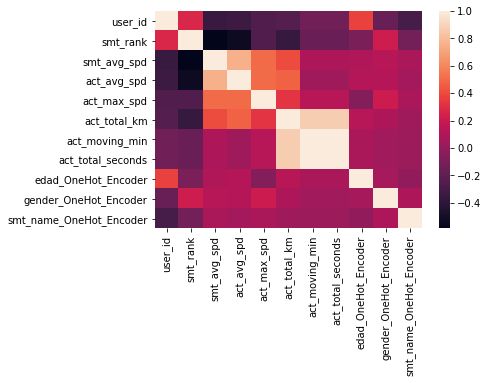

In [112]:
sns.heatmap(correladas);

## Modelo

In [113]:
#Cremamos un objeto LinearRegression
lr = LinearRegression()

In [114]:
X_train.shape

(5090, 11)

In [115]:
y_train.shape

(5090,)

In [116]:
#Entrenamos el modelo
lr.fit(X_train, y_train)

LinearRegression()

## Evaluación del modelo

In [117]:
#Displaying the Intercept
lr.intercept_

13.163999089862942

In [118]:
lr.coef_

array([-5.80374201e-04, -3.55152386e-03, -3.01246457e-01, -2.96475539e-03,
       -5.81809467e-03,  9.69156552e-02, -4.39625320e-06, -2.63775192e-04,
        1.48867072e-01,  6.22543924e-01,  2.83886041e-01])

In [119]:
predictions = lr.predict(X_test)
predictions

array([6.81921372, 7.22530135, 9.37998151, ..., 8.14535993, 7.51132215,
       6.26246065])

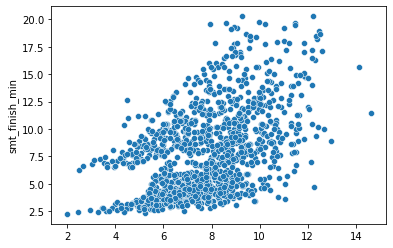

In [120]:
sns.scatterplot(x=predictions, y=y_test);

In [121]:
X_test.columns

Index(['user_id', 'smt_rank', 'smt_avg_spd', 'act_avg_spd', 'act_max_spd',
       'act_total_km', 'act_moving_min', 'act_total_seconds',
       'edad_OneHot_Encoder', 'gender_OneHot_Encoder',
       'smt_name_OneHot_Encoder'],
      dtype='object')

In [122]:
new_user = np.array([[2,4,50,55,85,120,180,4000,4,1,1]])

In [123]:
lr.predict(new_user)

array([9.50459459])

## Residuos


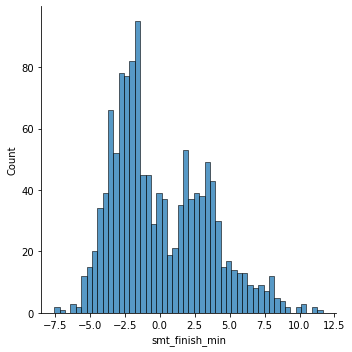

In [124]:
sns.displot((y_test - predictions),bins=50);

In [125]:
print("MSE:", metrics.mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MSE: 11.528010048137155
RMSE: 3.395292336182137


In [128]:
lr.score(X_train, y_train)

0.2318844496495227

In [129]:
lr.score(X_test, y_test)

0.23148759632158866